<a href="https://colab.research.google.com/github/FawazAhmad3/MachineLearning/blob/main/BallPrediction_gui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [35]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [25]:

# Function to load images from a directory and label them
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))])  # Filter to only directories
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                # Open the image file and convert to RGB
                with Image.open(img_path) as img:
                    img = img.convert('RGB')  # Ensure all images are RGB
                    img = img.resize((100, 100))
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label)
            except (IOError, UnidentifiedImageError) as e:
                # Skip files that can't be identified as images
                print(f"Skipping file {img_path}: {e}")
    return np.array(images), np.array(labels)


In [26]:

# Load training and testing data
train_folder = '/content/drive/MyDrive/multiclassCNN/train'
test_folder = '/content/drive/MyDrive/multiclassCNN/test'

x_train, y_train = load_images_from_folder(train_folder)
x_test, y_test = load_images_from_folder(test_folder)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [43]:
# Load VGG16 model without the top layers (classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


In [44]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


In [45]:

# Build the new model on top of the base VGG16 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [46]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [47]:

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [48]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:

# Train the model
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=25, validation_data=(x_test, y_test), callbacks=[early_stopping, lr_scheduler])


Epoch 1/25
229/229 [==============================] - 45s 195ms/step - loss: 2.3167 - accuracy: 0.2688 - val_loss: 1.8876 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 2/25
229/229 [==============================] - 44s 193ms/step - loss: 1.8903 - accuracy: 0.4099 - val_loss: 1.6807 - val_accuracy: 0.4927 - lr: 0.0010
Epoch 3/25
229/229 [==============================] - 43s 189ms/step - loss: 1.7605 - accuracy: 0.4551 - val_loss: 1.5771 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 4/25
229/229 [==============================] - 43s 189ms/step - loss: 1.6658 - accuracy: 0.4802 - val_loss: 1.5126 - val_accuracy: 0.5470 - lr: 0.0010
Epoch 5/25
229/229 [==============================] - 44s 191ms/step - loss: 1.6111 - accuracy: 0.4959 - val_loss: 1.4484 - val_accuracy: 0.5676 - lr: 0.0010
Epoch 6/25
229/229 [==============================] - 43s 186ms/step - loss: 1.5570 - accuracy: 0.5127 - val_loss: 1.4198 - val_accuracy: 0.5785 - lr: 0.0010
Epoch 7/25
229/229 [==============================] 

In [50]:

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


58/58 [==============================] - 8s 145ms/step - loss: 1.2275 - accuracy: 0.6410
Test Loss: 1.2275
Test Accuracy: 64.10%


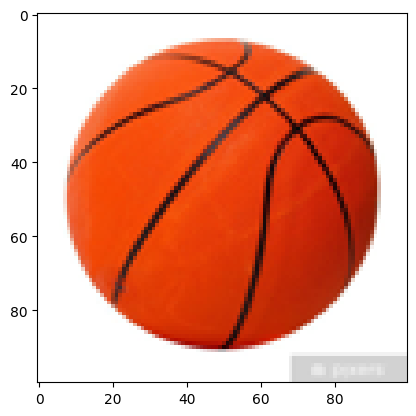

1/1 [==============================] - 0s 194ms/step
Predicted Class: basketball, Actual Class: basketball


In [51]:

# Display a random image and its prediction
idx2 = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[idx2])
plt.show()

# Predict the class of the image
y_pred = model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
predicted_class_idx = np.argmax(y_pred)

# Get the class names from the folder structure
class_names = sorted([d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))])

# Map the predicted class index and actual class index to their respective class names
predicted_class_name = class_names[predicted_class_idx]
actual_class_name = class_names[np.argmax(y_test[idx2])]

print(f"Predicted Class: {predicted_class_name}, Actual Class: {actual_class_name}")


In [52]:
!wget -q -O - ipv4.icanhazip.com

35.193.146.185


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://35.193.146.185:8501

your url is: https://tame-planes-shine.loca.lt
1/1 [==============================] - 0s 264ms/step
